---
<img src="https://ead.ufes.br/pluginfile.php/188418/course/summary/Banner%20IA%20e%20CD.png" style="float: right;">


#  Aprendizado Supervisionado

Utiliza conjuntos de dados rotulados que fazem o treinamento de algoritmos para classificar dados ou prever resultados com precisão. O modelo utiliza rótulos de dados para avaliar a relevância de diferentes características e melhorar gradualmente o desempenho dos resultados esperados.

O aprendizado supervisionado é classificado em duas categorias principais:

- **Classificação**: Problemas de classificação empregam algoritmos para classificar dados em segmentos específicos. Alguns algoritmos de classificação comuns:
   - regressão logística (l*ogistic regression*);
   - k-vizinhos mais próximos (KNN);
   - floresta aleatória (*Random-Forest*);
   - Naïve Bayes,
   - gradiente descendente estocástico
   - árvores de decisão (*decision tree*).


- **Regressão**: Este é um método estatístico de ML que utiliza algoritmos para avaliar a relação entre uma variável dependente e, um ou diversos fatores isolados. Com modelos de regressão, é possível fazer previsões de causa e efeito com base em múltiplos pontos de dados. Em uma empresa, por exemplo, isso pode incluir a projeção do crescimento da receita publicitária. Entre alguns algoritmos de regressão comuns estão a regressão ridge, lasso, regressão de redes neurais e regressão logística.




**Objetivo**

A intenção desse notebook é exemplificar um pipeline de um problema de **classificação**.

Não se apegue aqui com os detalhes da linguagem, você verá Python na próxima disciplina.

**Resultados Esperados**

1. Conceitos aprendizado  supervisionado
1. Primeiro contato com a scikit Learn
1. Carregar um conjunto de dados padrão: a base de dados  *Diabetes*
1. Separar os dados em conjunto de treino e teste (por enquanto não vamos usar validação)
1. Treinar uma regressão linear
1. Calcular as métricas de erro

# Exemplo de um problema de classificação
A intenção desse notebook é exemplificar um pipeline de um problema de classificação. Ainda não se preocupe muito sobre o código. O intuito é observar os conceitos (por enquanto). Na próxima aula já vamos avançar com codificação.

Em resumo, vamos fazer o seguinte:
- Carregar a base de emails rotulados como  normais e Spam https://archive.ics.uci.edu/dataset/94/spambase
- Separar os dados em conjunto de treino e teste (por enquanto não vamos usar validação)
- Aplicar uma normalização (vamos aprender mais sobre isso em breve)
- Treinar uma regressão logistica
- Calcular acurácia no conjunto de treino
- Calcular acurácia no conjunto de teste

## Introdução

Aprendizado supervisionado é uma área de aprendizado de máquina que tem o objetivo de **aprender** de dados rotulados.

Hoje, daremos foco aos problemas de classificação:

**Modelos de Classificação** visam aprender as características das amostras e suas respectivas classes (também chamada de rótulo/label/target) para que possa acertar a classe de uma amostra desconhecida.

Veja o cheat-sheet da sci-kit learn de quando usar classificação!


# Scikit-Learn - Mapa de algoritmos disponíves

[<img src="https://scikit-learn.org/1.3/_static/ml_map.png" style="float: right;">](https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html)


## Importandos as bibliotecas
Vamos usar basicamente a `sklearn`. No módulo 2 já vamos aprender mais sobre ela. Por enquanto, aceita que ela existe e observe apenas o pipeline.

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

## Carregando os dados

Essa base de dados contém informações de emails sumarizados. Em resumo,  tem-se:

1. Class Distribution:

	Spam	  1813  (39.4%)

	Non-Spam  2788  (60.6%)

1. Última coluna indica se é um spam ou não

  Atributo de classe nominal {0,1} indica se o e-mail foi considerado spam (1) ou não (0).

1. Demais atributos relativos a frequencia de palavras e letras no email.

A descrição completa das características dos emails pode ser vista em https://archive.ics.uci.edu/dataset/94/spambase

In [2]:
df = pd.read_csv('http://www.inf.ufes.br/~vinicius.mota/Intro-IA-CD/08-metricas/spambase.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

## Separando os vetores de características e de rótulos

In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
nome_labels =  np.array(['Not-Spam', 'Spam'])


## Pre-processamento dos dados
- Dividir o dataset me treino e teste
- Normalizar os dados usando `MinMaxScaler`

In [5]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=32)
print(f"Tamanho do conjunto de treino: {len(X_treino)}")
print(f"Tamanho do conjunto de teste: {len(X_teste)}")

Tamanho do conjunto de treino: 3450
Tamanho do conjunto de teste: 1151


### Normalizando os dados

In [6]:
normalizador = MinMaxScaler()
normalizador.fit(X_treino)
X_treino_norm = normalizador.transform(X_treino)
X_teste_norm = normalizador.transform(X_teste)

## Configurando e treinando um  modelo

No código exemplo, importamos e configuramos uma regressão logística

Para o exercício deste Colab, você irá alterar o modelo e executar novamente daqui em diante.

In [7]:
#@title importando as bibibliotecas

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

### Selecionando um modelo de aprendizado supervisionado

Substitua a célula abaixo para os exercícios no final deste Notebook.

In [8]:
modelo = LogisticRegression()

In [9]:
modelo.fit(X_treino_norm, y_treino)

LogisticRegression()

### Calculando acurácia de treino e teste

In [10]:
print(f"Acurácia de treinamento: {modelo.score(X_treino_norm, y_treino)}")
print(f"Acurácia de teste: {modelo.score(X_teste_norm, y_teste)}")

Acurácia de treinamento: 0.8991304347826087
Acurácia de teste: 0.8870547350130321


### Obtendo a classe de uma dada amostra

Vamos escolher uma amostra aleatória e ver como o nosso classificador a classificou.

No exemplo do código abaixo, escolhemos `k=10`, ou seja, a décima amostra do conjunto teste. Vericamos qual o rótulo desta amostra.

In [11]:
k = 1
amostra = X_teste.iloc[k]
print("Amostra:\n", amostra)

print("\n---- Normalizando a amostra: ---")
amostra_norm = normalizador.transform([amostra])[0]
print(amostra_norm)
print("Rótulo:", nome_labels[y_teste.iloc[k]])

Amostra:
 0       0.000
1       0.000
2       0.900
3       0.000
4       0.450
5       0.000
6       0.000
7       0.000
8       0.000
9       0.000
10      0.000
11      0.900
12      0.450
13      0.000
14      0.000
15      0.450
16      0.900
17      0.000
18      4.520
19      0.000
20      0.900
21      0.000
22      0.450
23      0.000
24      0.000
25      0.000
26      0.000
27      0.000
28      0.000
29      0.000
30      0.000
31      0.000
32      0.000
33      0.000
34      0.000
35      0.000
36      0.000
37      0.000
38      0.000
39      0.000
40      0.000
41      0.000
42      0.000
43      0.000
44      1.350
45      0.000
46      0.000
47      0.000
48      0.000
49      0.000
50      0.000
51      2.115
52      0.070
53      0.000
54      2.651
55     14.000
56    114.000
Name: 615, dtype: float64

---- Normalizando a amostra: ---
[0.         0.         0.17647059 0.         0.04950495 0.
 0.         0.         0.         0.         0.         0.09307135
 0.081

Agora vamos inserir  a mostra normalizada no nosso preditor:

In [12]:
lab_pred = modelo.predict([amostra_norm])
prob_pred = modelo.predict_proba([amostra_norm])
print("Rótulo Real:", nome_labels[y_teste.iloc[k]])
print("Rótulo predito:", nome_labels[lab_pred])
print("Probabilidade:", prob_pred[0][1], "%")

Rótulo Real: Spam
Rótulo predito: ['Spam']
Probabilidade: 0.7670406793425543 %


# Obtendo a matriz de confusão

In [13]:
from sklearn.metrics import confusion_matrix
pred_teste = modelo.predict(X_teste_norm)
cm = confusion_matrix(y_teste, pred_teste)
cm

array([[664,  41],
       [ 89, 357]])

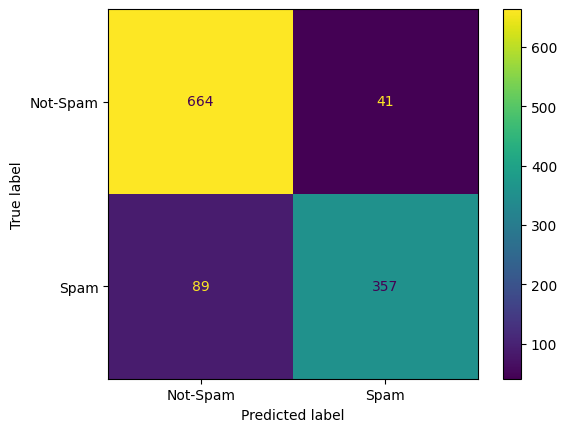

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nome_labels)
disp.plot()

# Obtendo Acurácia, Precision, Recall e F1-score

In [15]:
tn, fp, fn, tp = cm.ravel()
print(f"TP: {tp}\nTN: {tn}\nFP: {fp}\nFN: {fn}")

TP: 357
TN: 664
FP: 41
FN: 89


In [16]:
acc = (tp + tn) / (tp + tn + fp + fn)
print(f"Acuracia: {100 * acc:.2f}%")

Acuracia: 88.71%


In [17]:
precision = tp / (tp + fp)
print(f"Precision: {100 * precision:.2f}%")

Precision: 89.70%


In [18]:
recall = tp / (tp + fn)
print(f"Recall: {100 * recall:.2f}%")

Recall: 80.04%


In [19]:
f1 = 2 * (precision * recall)/(precision + recall)
print(f"F1-score: {100 * f1:.2f}%")

F1-score: 84.60%


### ... ou simplesmente, podemos chamar as funções já prontas

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(f"Acuracia: {100 * accuracy_score(y_teste, pred_teste):.2f}%")
print(f"Precision: {100 * precision_score(y_teste, pred_teste):.2f}%")
print(f"Recall: {100 * recall_score(y_teste, pred_teste):.2f}%")
print(f"F1-score: {100 * f1_score(y_teste, pred_teste):.2f}%")

Acuracia: 88.71%
Precision: 89.70%
Recall: 80.04%
F1-score: 84.60%


 # Calculando a Curva ROC e obtendo a AUC

In [21]:
#@title Gerando os thresholds
from sklearn.metrics import roc_curve, auc

lab_preds = modelo.predict(X_teste_norm)  #Alterando os thresholds
prob_preds = modelo.predict_proba(X_teste_norm)

fpr, tpr, thresholds = roc_curve(y_teste, prob_preds[:,1])
roc_auc = auc(fpr, tpr)
for k in range(len(fpr)):
  print(f"Threshold = {thresholds[k]} | FPR = {fpr[k]:.2f} | TPR = {tpr[k]:.2f}")

print(f"\nAUC = {roc_auc}")

Threshold = inf | FPR = 0.00 | TPR = 0.00
Threshold = 0.9997884399231334 | FPR = 0.00 | TPR = 0.00
Threshold = 0.9995203273576673 | FPR = 0.00 | TPR = 0.01
Threshold = 0.9987809155273706 | FPR = 0.00 | TPR = 0.01
Threshold = 0.9403224833629774 | FPR = 0.00 | TPR = 0.17
Threshold = 0.9402388673468224 | FPR = 0.00 | TPR = 0.18
Threshold = 0.9381126467295167 | FPR = 0.00 | TPR = 0.18
Threshold = 0.9320133825545454 | FPR = 0.00 | TPR = 0.18
Threshold = 0.9218626966014282 | FPR = 0.00 | TPR = 0.22
Threshold = 0.9211791136811305 | FPR = 0.00 | TPR = 0.22
Threshold = 0.9181225967027146 | FPR = 0.00 | TPR = 0.22
Threshold = 0.9140375340292214 | FPR = 0.00 | TPR = 0.22
Threshold = 0.8846418074320881 | FPR = 0.00 | TPR = 0.28
Threshold = 0.8820798197680261 | FPR = 0.01 | TPR = 0.28
Threshold = 0.8769203315297769 | FPR = 0.01 | TPR = 0.29
Threshold = 0.8765357830664429 | FPR = 0.01 | TPR = 0.29
Threshold = 0.839949614468695 | FPR = 0.01 | TPR = 0.36
Threshold = 0.8384356850161087 | FPR = 0.01 | T

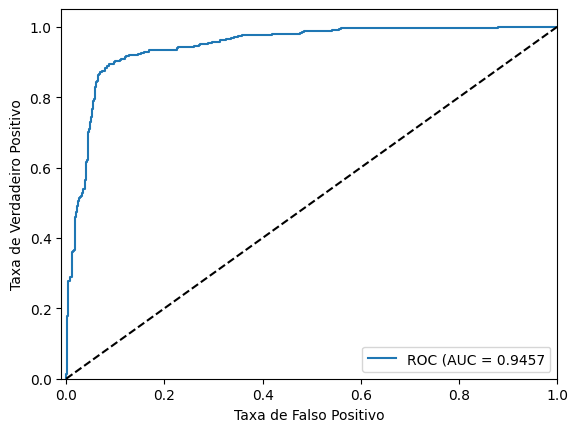

In [22]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="k", linestyle="--")
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.legend(loc="lower right")
plt.show()

#Exercícios  

O objetivo deste exercício é ilustrar a natureza dos limites de decisão de diferentes classificadores. No entanto, lembre-se que o melhor classificador para este problema não necessariamente será o melhor para outros problemas.

Agora que você já sabe avaliar as métricas de problemas de classificação. Altere o modelo de regressão logística  para avaliar outros modelos.


Para isto,  no bloco "***Selecionando o modelo de aprendizado supervisionado***", substitua as linhas de código do modelo por cada um dos modelos abaixo. Para cada modelo, execute o Notebook novamente  e anote as métricas para discutir o desempenho dos modelos.

Dica:  `CTRL +F10` executa tudo apenas do bloco alterado para baixo.

Modelos:

1.  Naive Bayes

   ```
    modelo =  GaussianNB()
   ```

1. KNN

  ```
  modelo  = KNeighborsClassifier(3)
  ```

1. Árvore de decisão

  ```
  modelo  =  DecisionTreeClassifier(max_depth=5, random_state=42)
  ```


1. Árvore aleatória

  ```
  modelo  = RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    )
  ```

1. SVM

  ```
  modelo  =  SVC(kernel="linear", C=0.025, random_state=42, probability = True)
  ```


1. Rede neural MLP

  ```
  modelo  =  MLPClassifier(alpha=1, max_iter=1000, random_state=42)
  ```


Observação importante: Este exercício apresenta vários modelos que ainda serão explicados em detalhes em outras disciplinas!!! O foco deve ser em comparar as métricas destes modelos.


##Entrega:

 Você deverá preencher a tabela abaixo, salvar o notebook e submetê-lo no Moodle:

1.  Uma tabela descritiva contendo os modelos e as métricas, por exemplo:

| Modelo               | Acurácia | Precision | Recall | F1-Score | AUC   |
| -------------        |----------|-----------|--------|----------|-------|
| Regressão Logística  | 97.20%   | 96.63%    |98.85%  | 97.73%   | 0.9961|
| Naive Bayes   |  80.54%|	67.45%|	96.19%	|79.30%	|0.911161  |
| KNN   |88.18%	|86.90%	|81.84%	|84.30%	|0.925346|
|Árvore de decisão| 89.92%	|91.25%	|81.84%|	86.29%|	0.915229|
|Random Forest|	84.01%|	90.43%	|65.70%	|76.10%	|0.931311||
|SVM	|77.24%|	89.32%|	46.86%	|61.47%|	0.909288|
|MLP|	88.62%	|89.08%	|80.49%	|84.57%	|0.945409|




2.  Uma discussão curta sobre os resultados para cada uma das métricas.  Quais foram os melhores algoritmos. Em quais métricas cada algoritmo se destacou.  Para o problema de detecção de Spam, qual seria o algoritmo recomendável, considerando esta base de dados.

In [23]:
modelo1 =  GaussianNB()
modelo2  = KNeighborsClassifier(3)
modelo3  =  DecisionTreeClassifier(max_depth=5, random_state=42)
modelo4  = RandomForestClassifier(
     max_depth=5, n_estimators=10, max_features=1, random_state=42
 )
modelo5  =  SVC(kernel="linear", C=0.025, random_state=42, probability = True)
modelo6  =  MLPClassifier(alpha=1, max_iter=1000, random_state=42)

In [24]:
modelo1.fit(X_treino_norm, y_treino)
modelo2.fit(X_treino_norm, y_treino)
modelo3.fit(X_treino_norm, y_treino)
modelo4.fit(X_treino_norm, y_treino)
modelo5.fit(X_treino_norm, y_treino)
modelo6.fit(X_treino_norm, y_treino)

MLPClassifier(alpha=1, max_iter=1000, random_state=42)

In [28]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Criando o DataFrame para armazenar os resultados
resultados = pd.DataFrame(columns=["Modelo", "Acurácia", "Precision", "Recall", "F1-Score", "AUC"])

# Lista de modelos e nomes
modelos = [("Naive Bayes", modelo1),
           ("KNN", modelo2),
           ("Árvore de decisão", modelo3),
           ("Random Forest", modelo4),
           ("SVM", modelo5),
           ("MLP", modelo6)]

# Iterando sobre cada modelo
for nome, modelo in modelos:
    # Fazendo previsões
    pred_teste = modelo.predict(X_teste_norm)
    prob_teste = modelo.predict_proba(X_teste_norm)[:, 1] if hasattr(modelo, "predict_proba") else None

    # Calculando as métricas
    acuracia = 100 * accuracy_score(y_teste, pred_teste)
    precision = 100 * precision_score(y_teste, pred_teste)
    recall = 100 * recall_score(y_teste, pred_teste)
    f1 = 100 * f1_score(y_teste, pred_teste)
    auc = 100 * roc_auc_score(y_teste, prob_teste) if prob_teste is not None else "N/A"

    # Adicionando os resultados ao DataFrame usando loc
    resultados.loc[len(resultados)] = [nome,
                                       f"{acuracia:.2f}%",
                                       f"{precision:.2f}%",
                                       f"{recall:.2f}%",
                                       f"{f1:.2f}%",
                                       f"{auc:.4f}" if auc != "N/A" else auc]

# Exibindo a tabela de resultados
print(resultados)


              Modelo Acurácia Precision  Recall F1-Score      AUC
0        Naive Bayes   80.54%    67.45%  96.19%   79.30%  91.1161
1                KNN   88.18%    86.90%  81.84%   84.30%  92.5346
2  Árvore de decisão   89.92%    91.25%  81.84%   86.29%  91.5229
3      Random Forest   84.01%    90.43%  65.70%   76.10%  93.1311
4                SVM   77.24%    89.32%  46.86%   61.47%  90.9288
5                MLP   88.62%    89.08%  80.49%   84.57%  94.5409
